In [70]:
import statsmodels.api as sm
# Jem 은 편의를 위해 만든 모듈
import Jem
import matplotlib.pyplot as plt
import pandas as pd

AAPL = Jem.stockStat('AAPL')
MSFT = Jem.stockStat('MSFT')

df_AAPL = AAPL.get_stock_data('2020-01-01')
df_MSFT = MSFT.get_stock_data('2020-01-01')

df_AAPL.rename(columns={'Close':'AAPL'}, inplace=True)
df_MSFT.rename(columns={'Close':'MSFT'}, inplace=True)

aapl_diff = AAPL.log_pct_change(df_AAPL['AAPL'])
msft_diff = MSFT.log_pct_change(df_MSFT['MSFT'])

dataset = pd.concat([aapl_diff,msft_diff], axis= 1)

res = sm.OLS(aapl_diff, msft_diff).fit()
res.summary()

show you AAPL's stock data
show you MSFT's stock data


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   AAPL   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              860.7
Date:                Thu, 05 Aug 2021   Prob (F-statistic):                   9.41e-102
Time:                        17:41:59   Log-Likelihood:                         -714.39
No. Observations:                 401   AIC:                                      1431.
Df Residuals:                     400   BIC:                                      1435.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MSFT           0.8991      0.031     29.337      0.000       0.839       0.959
==============================================================================
Omnibus:                       86.682   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.386
Skew:                           0.711   Prob(JB):                    2.32e-129
Kurtosis:                       8.782   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

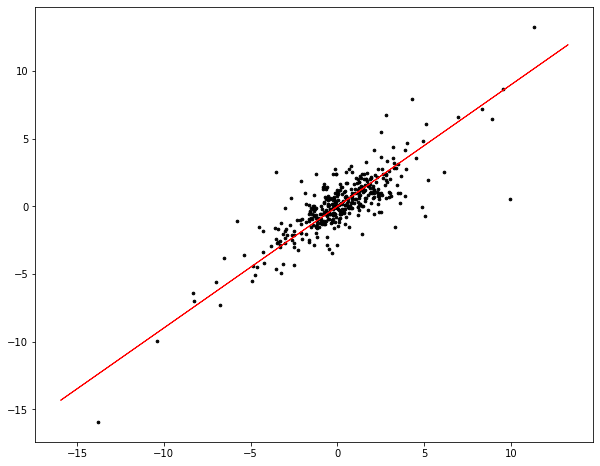

In [63]:
plt.rcParams['lines.linewidth'] = 1
plt.scatter(aapl_diff, msft_diff, s =7, c='black')
plt.plot(msft_diff, 0.8991*msft_diff, c='red')

In [66]:
from statsmodels.stats.stattools import jarque_bera

In [67]:
jarque_bera(aapl_diff-0.8991*msft_diff)

(592.380955878183,
 2.3233243212245802e-129,
 0.7110245454812788,
 8.782041004791306)

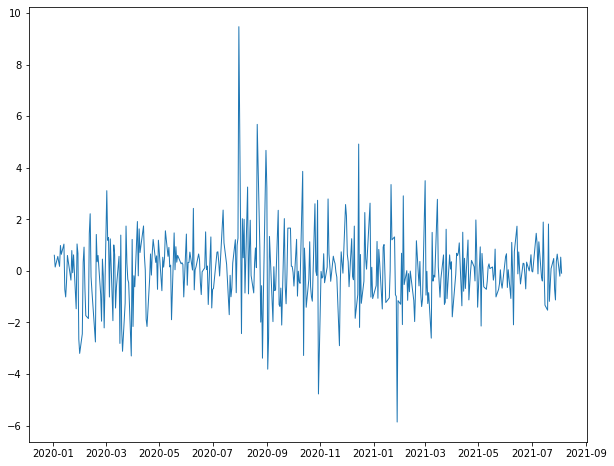

In [69]:
residual = aapl_diff-0.8991*msft_diff
plt.plot(residual)